# K-Means Approach to find groups in logaritmic dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

## Reading logaritmic dataset

In [2]:
DATA = pd.read_csv("../Log_FinalData.csv", index_col="Unnamed: 0")
DATA

,log_pctWSocSec,log_perCapInc,log_PctEmplProfServ,log_FemalePctDiv,log_NumImmig,log_PctImmigRec10,log_PctPersOwnOccup,log_PctHousLess3BR,log_OwnOccLowQuart,log_PctSameCity85,log_PctSameState85,log_LandArea,log_PopDens,log_PctUsePubTrans,log_ViolentCrimesPerPop,log_racepctblack,log_racePctWhite,log_racePctAsian,log_racePctHisp
0,0.110590,0.146128,0.149219,0.243038,0.012837,0.143015,0.190332,0.178977,0.086360,0.178977,0.214844,0.049218,0.100371,0.079181,0.079181,0.008600,0.278754,0.049218,0.068186
1,0.096910,0.136721,0.060698,0.281033,0.004321,0.212188,0.100371,0.260071,0.082785,0.204120,0.181844,0.008600,0.049218,0.161368,0.222716,0.049218,0.240549,0.161368,0.029384
2,0.139879,0.103804,0.110590,0.232996,0.000000,0.075547,0.152288,0.178977,0.071882,0.222716,0.193125,0.004321,0.082785,0.008600,0.155336,0.173186,0.193125,0.068186,0.017033
3,0.133539,0.133539,0.161368,0.173186,0.008600,0.117271,0.287802,0.004321,0.093422,0.214844,0.217484,0.008600,0.143015,0.107210,0.049218,0.301030,0.033424,0.049218,0.041393
4,0.158362,0.155336,0.139879,0.079181,0.000000,0.103804,0.276462,0.075547,0.117271,0.206826,0.184691,0.017033,0.037426,0.008600,0.012837,0.008600,0.290035,0.037426,0.021189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.113943,0.173186,0.225309,0.201397,0.004321,0.167317,0.190332,0.173186,0.079181,0.170262,0.143015,0.004321,0.107210,0.021189,0.037426,0.041393,0.271842,0.049218,0.064458
1990,0.100371,0.071882,0.149219,0.193125,0.021189,0.222716,0.049218,0.204120,0.133539,0.041393,0.000000,0.008600,0.136721,0.079181,0.161368,0.164353,0.107210,0.262451,0.120574
1991,0.198657,0.117271,0.146128,0.176091,0.025306,0.100371,0.139879,0.220108,0.123852,0.252853,0.245513,0.033424,0.120574,0.071882,0.089905,0.096910,0.227887,0.017033,0.096910
1992,0.152288,0.146128,0.195900,0.113943,0.025306,0.173186,0.143015,0.214844,0.187521,0.201397,0.181844,0.012837,0.139879,0.123852,0.075547,0.025306,0.271842,0.086360,0.041393


## Finding optimal number of clusters for K-Means
The "Knee point" detection won't be considered as the method to define the inflection point of the K-clusters numbers; the Silhouette score will help us search this quantity by searching for an adequate max value

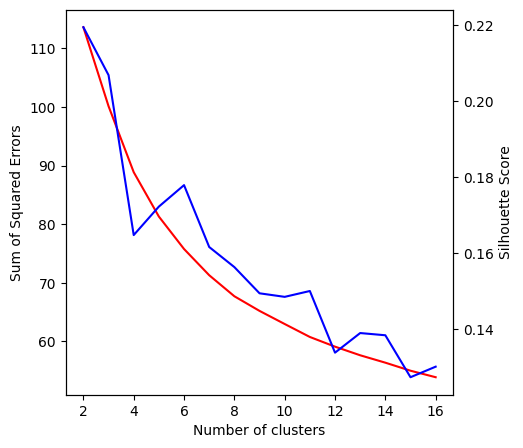

In [3]:
Rango_Clusters = range(2, 17)
N = len(Rango_Clusters)
SSE = N*[0.0]
SILS = N*[0.0]
for index, n in enumerate(Rango_Clusters):
    K_Means = KMeans(n_clusters = n, init = "k-means++", n_init=10, random_state = 21)
    K_Means.fit(DATA)
    Labels = K_Means.labels_

    SSE[index] = K_Means.inertia_
    SILS[index] = silhouette_score(DATA, Labels, metric="euclidean")

Figura, Sub1 = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
Sub2 = Sub1.twinx()

Sub1.plot(Rango_Clusters, SSE, "-r")
Sub1.set_xlabel("Number of clusters")
Sub1.set_ylabel("Sum of Squared Errors")

Sub2.plot(Rango_Clusters, SILS, "-b")
Sub2.set_ylabel("Silhouette Score")

plt.show()

We can observe that with 3 clusters there is remarkable inflection point on the Silhouette Score curve. Given this info, we will pick this as the optimal number of clusters.

## Using optimal number of clusters

In [4]:
N_Clusters = 3
K_Means = KMeans(n_clusters = N_Clusters, init = "k-means++", n_init=10, random_state = 21)
K_Means.fit(DATA)

DATA["Cluster_Label"] = K_Means.predict(DATA)
DATA.Cluster_Label.value_counts()

1    1073
2     543
0     378
Name: Cluster_Label, dtype: int64

## Observing variables by K-Means clustering

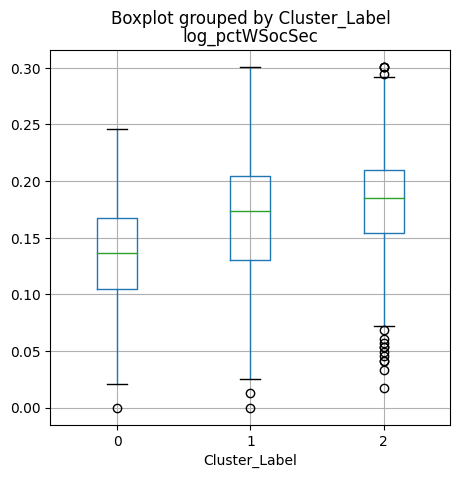

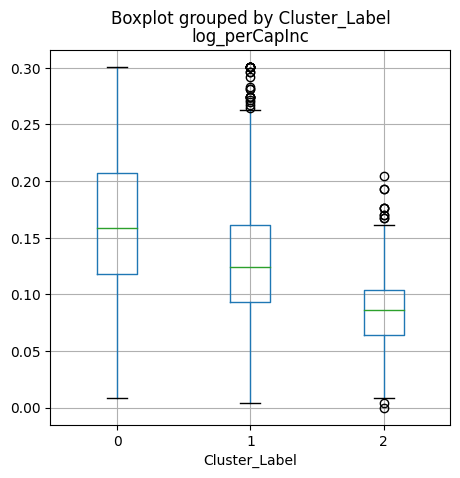

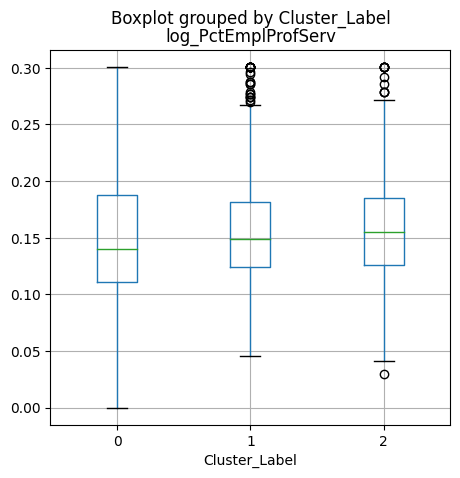

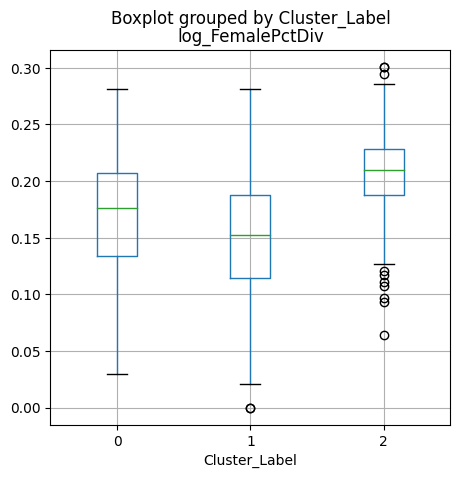

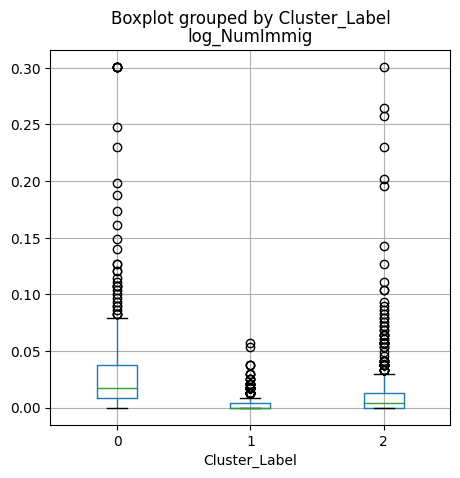

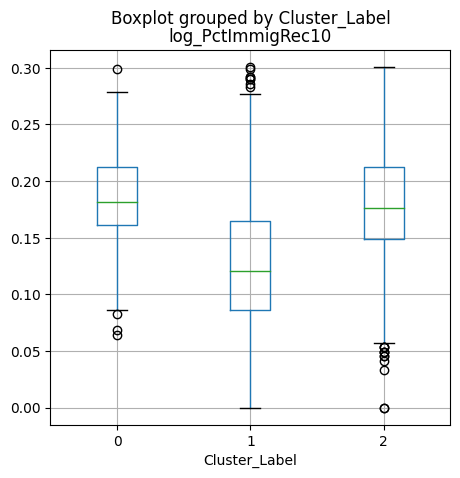

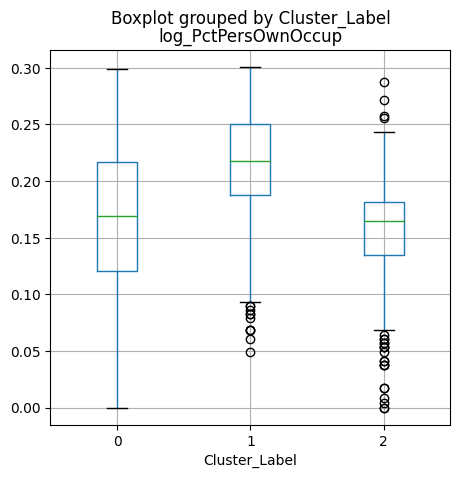

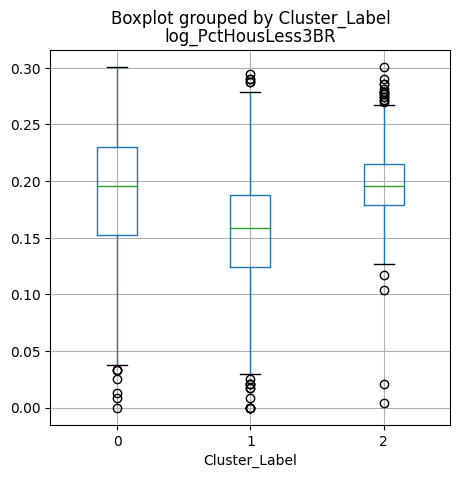

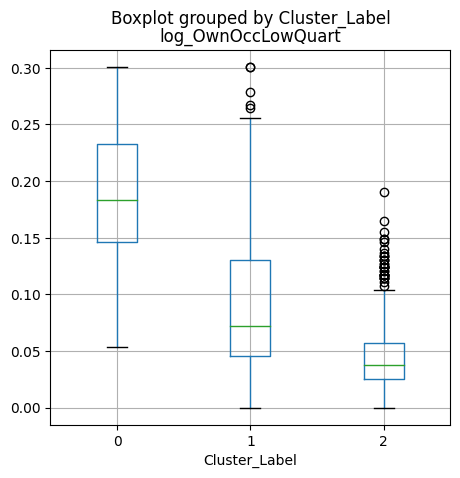

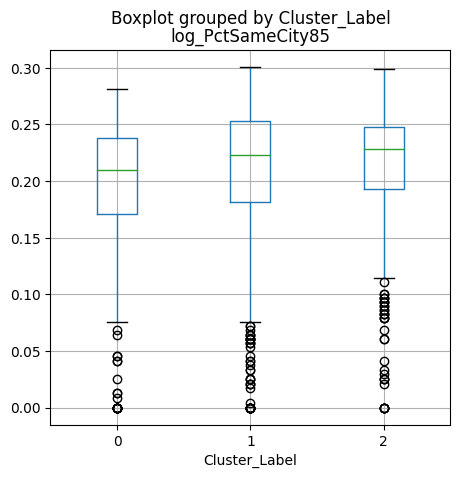

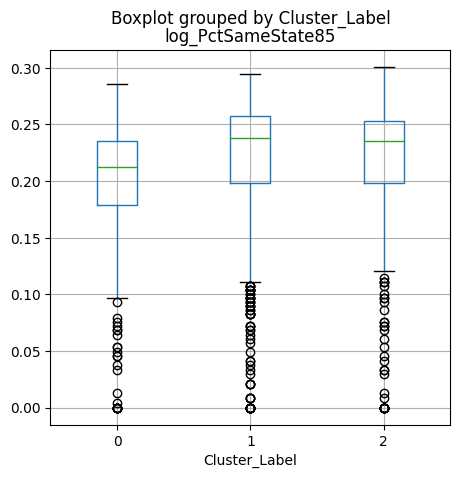

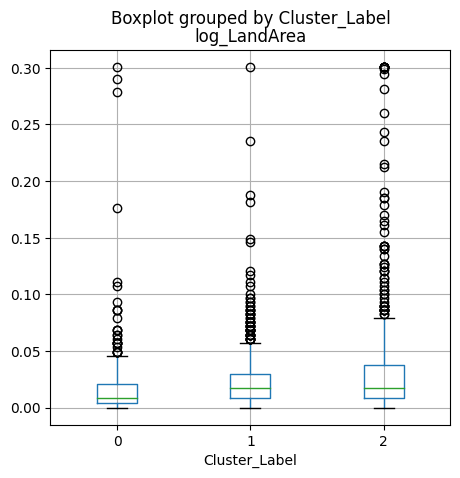

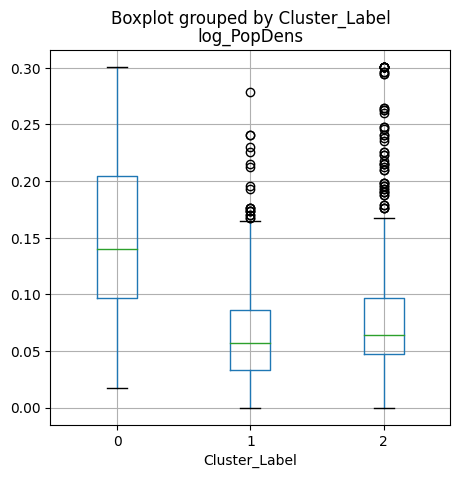

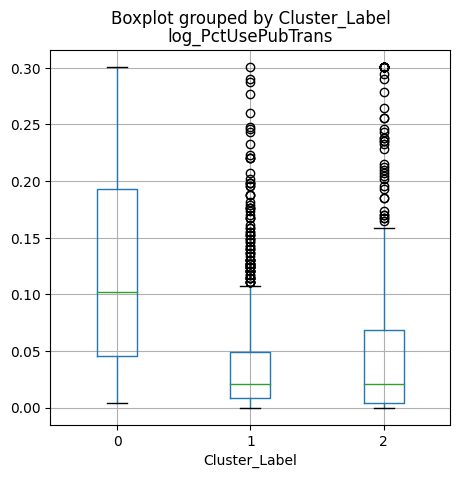

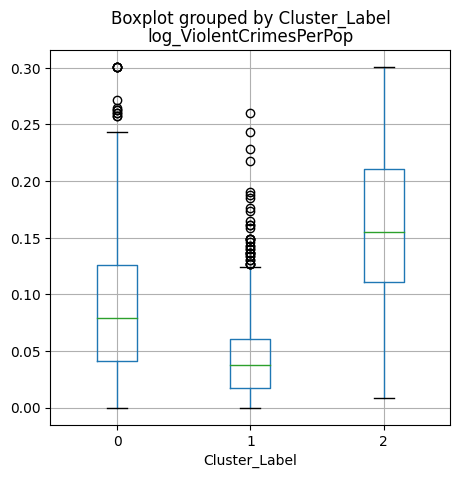

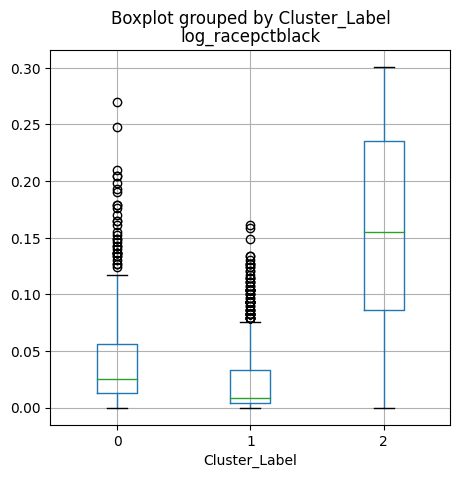

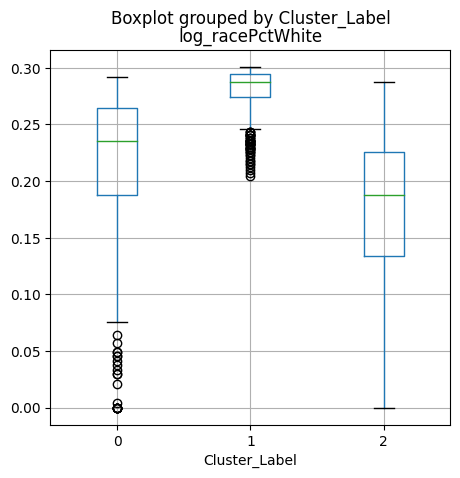

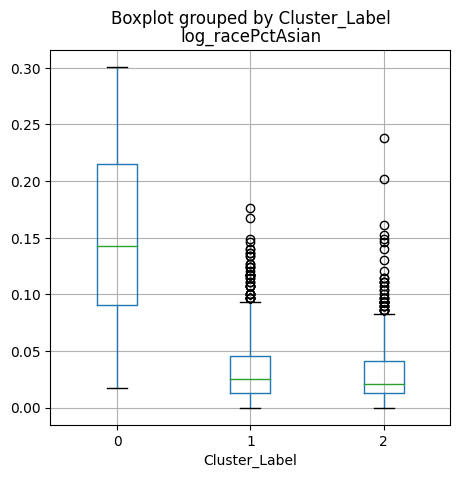

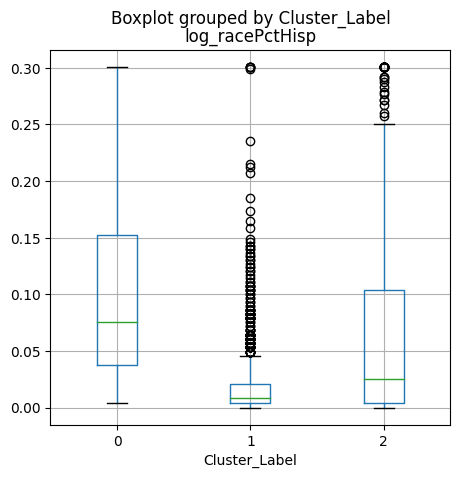

In [5]:
N_columns = len(DATA.columns)
for column in DATA.columns[:N_columns-1]:
    DATA.boxplot(column = column, by = "Cluster_Label", figsize = (5,5))
    plt.show()

Now let's visualize scatter plots respect to _ViolentCrimesPerPop_ given the clusters' labels.

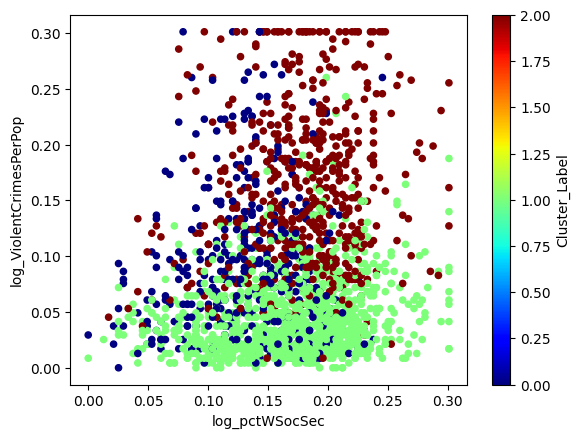

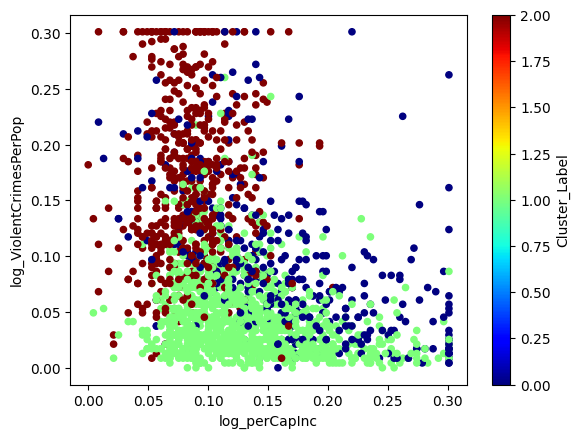

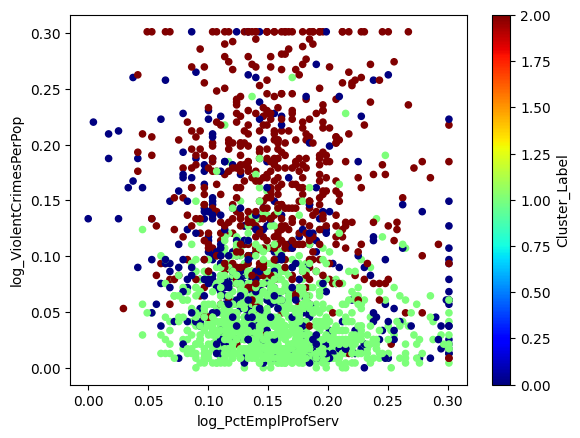

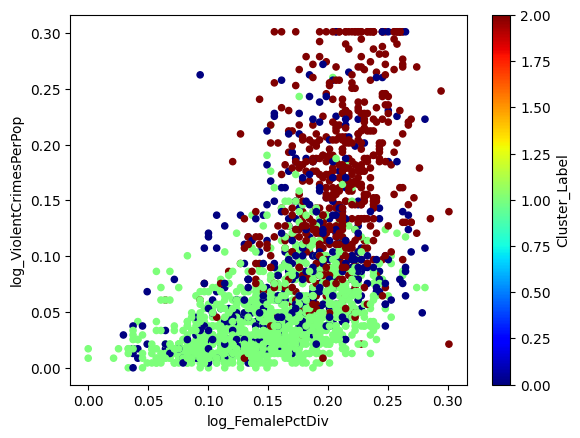

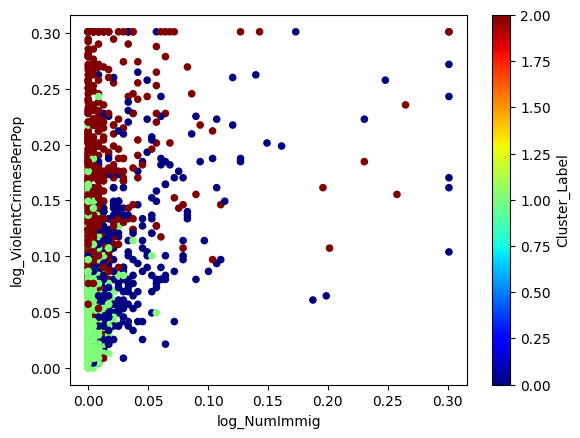

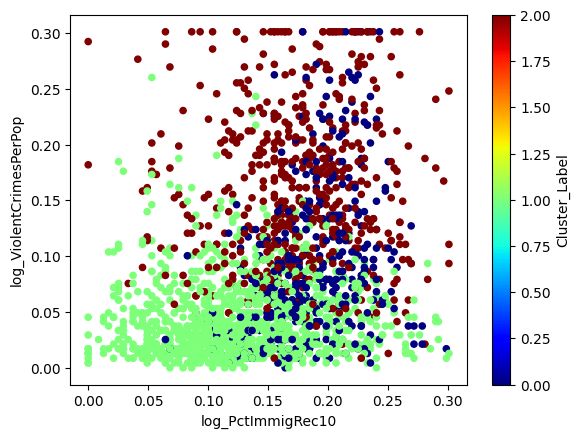

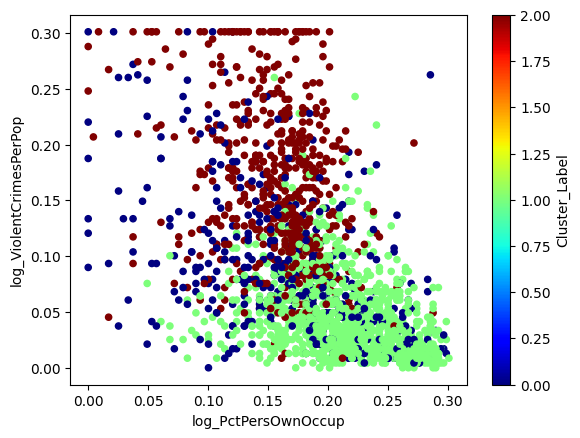

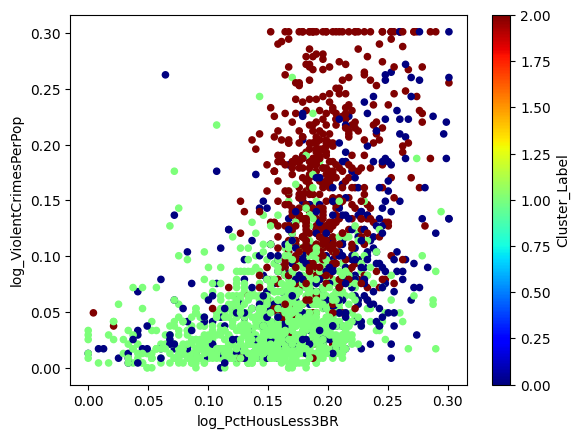

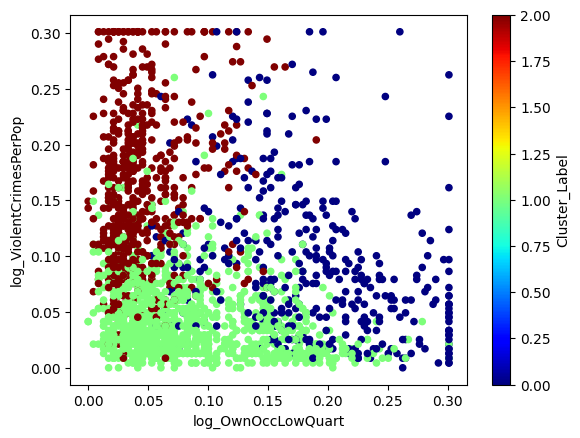

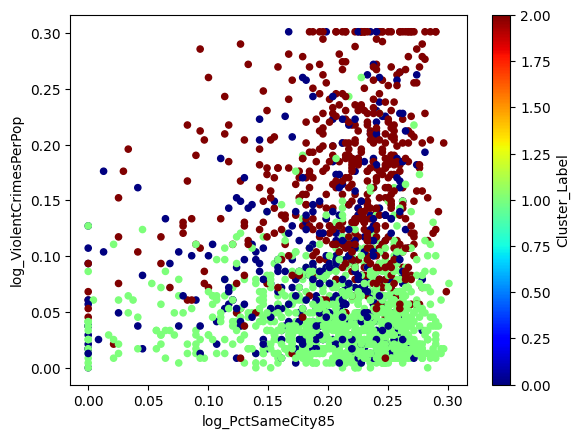

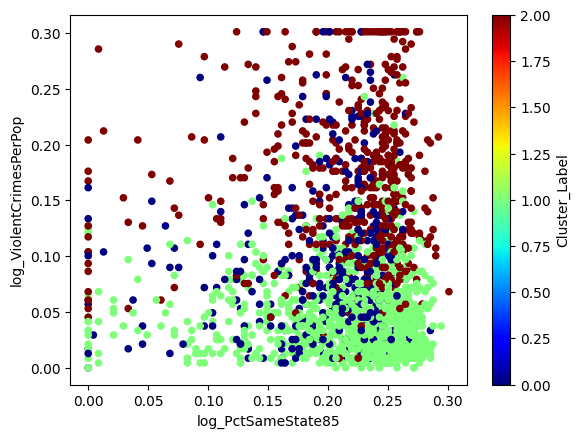

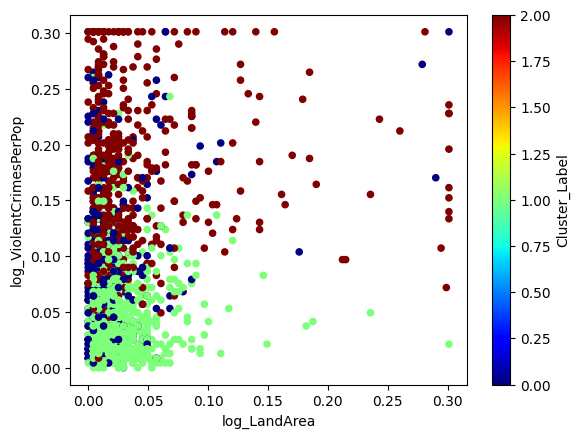

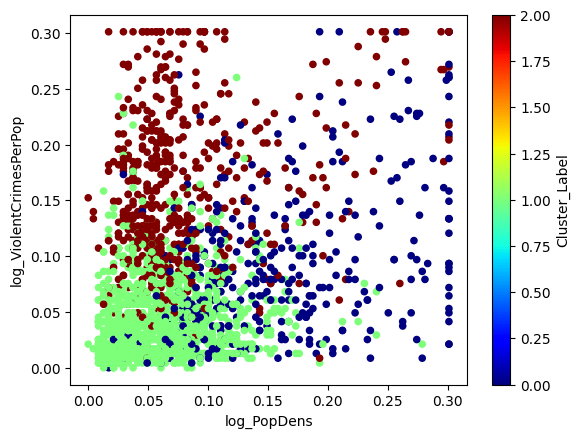

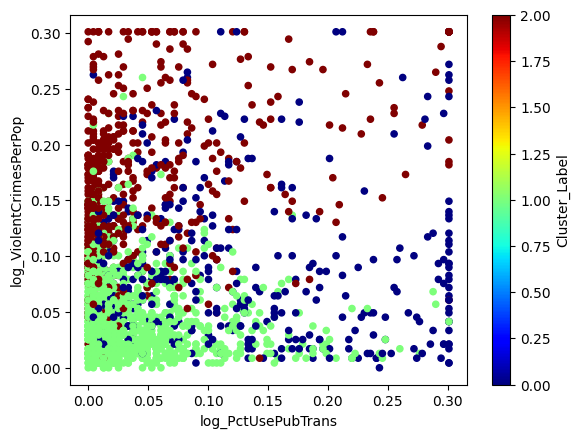

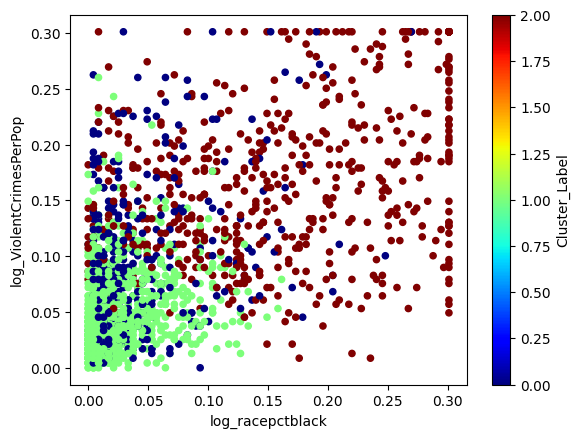

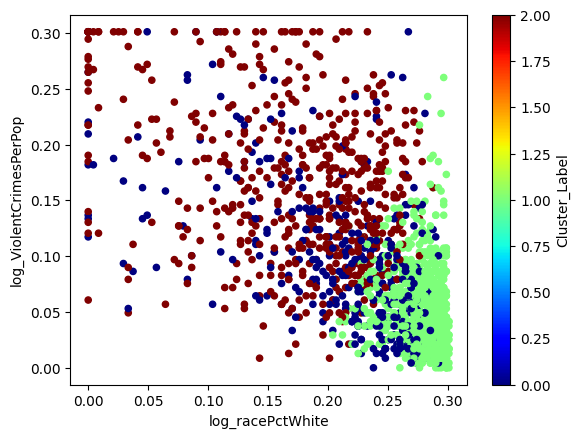

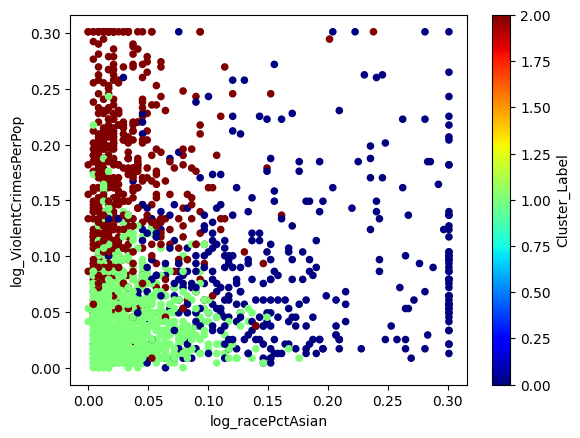

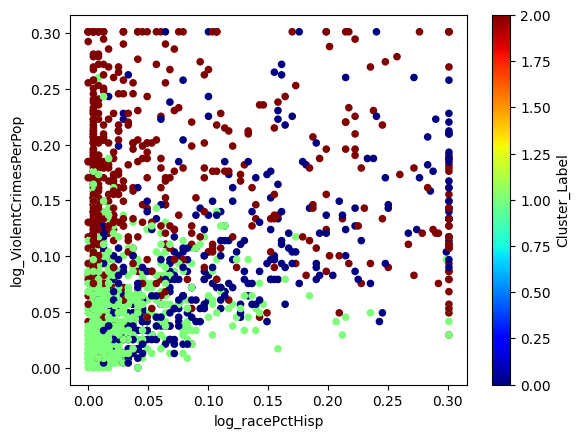

In [6]:
for column in DATA.columns[:N_columns-1]:
    if column != "log_ViolentCrimesPerPop":
        DATA.plot.scatter(x=column, y="log_ViolentCrimesPerPop", c="Cluster_Label", cmap="jet")